<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-18 13:05:31--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.3’

survey-results-publ 100%[===================>] 201.62M  62.9MB/s    in 3.3s    

2025-03-18 13:05:42 (61.9 MB/s) - ‘survey-results-public.sqlite.3’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
import seaborn as sns
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [3]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [4]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [5]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


In [6]:
QUERY = "SELECT * FROM main"
df = pd.read_sql_query(QUERY, conn)

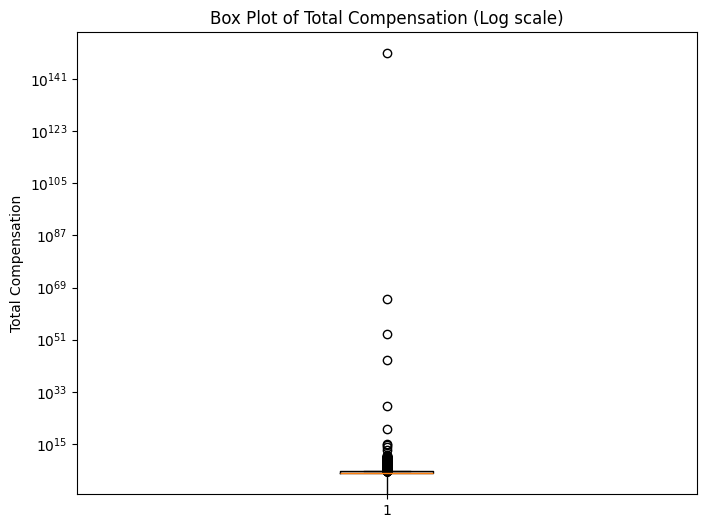

In [7]:
# SQL Query to filter rows where CompTotal are not null
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""
# Execute the query and load the result into a DataFrame
df_comp_total = pd.read_sql_query(QUERY, conn)

#create boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_comp_total['CompTotal'])
plt.yscale('log')
plt.title('Box Plot of Total Compensation (Log scale)')
plt.ylabel('Total Compensation')
plt.show()





**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


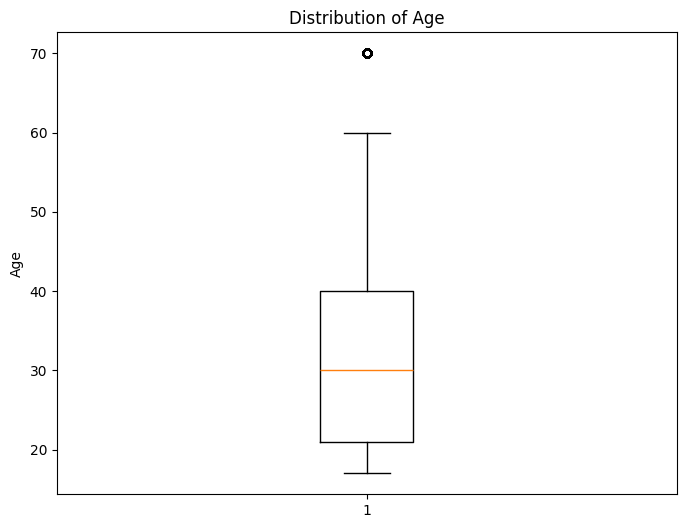

In [8]:
#SQLquery to transform Age into numerical values
QUERY = """
SELECT Age,
    CASE
        WHEN Age = 'Under 18 years old' THEN 17
        WHEN Age = '18-24 years old' THEN 21
        WHEN Age = '25-34 years old' THEN 30
        WHEN Age = '35-44 years old' THEN 40
        WHEN Age = '45-54 years old' THEN 50
        WHEN Age = '55-64 years old' THEN 60
        WHEN Age = '65 years or older' THEN 70
        ELSE NULL
    END AS Age_numeric
FROM main
WHERE Age IS NOT NULL
AND Age != 'Prefer not to say'
AND Age != 'Other value to exclude';
"""        
# Execute the query and load the result into a DataFrame
df_age_num = pd.read_sql_query(QUERY, conn)

#create boxplot
plt.figure(figsize=(8,6))
plt.boxplot(df_age_num['Age_numeric'])
plt.title('Distribution of Age')
plt.ylabel('Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


/tmp/ipykernel_3690/2923891949.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AgeGroup', y='CompTotal', data=df_age_comp, palette='Set2')


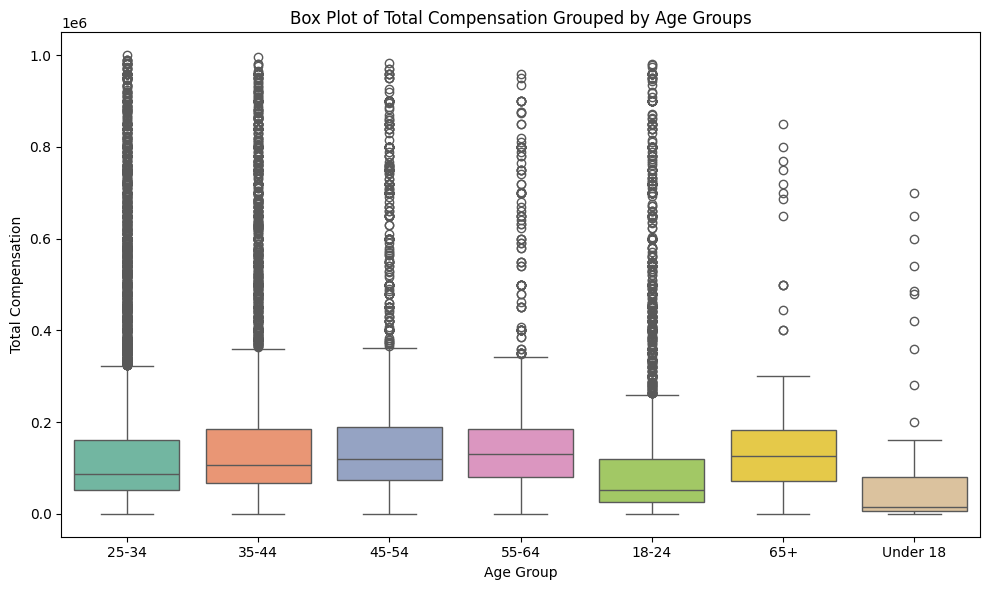

In [9]:
# SQL query to transform Age into AgeGroup and filter CompTotal
query = """
WITH transformed_data AS (
    SELECT 
        CASE 
            WHEN Age = 'Under 18 years old' THEN 'Under 18'
            WHEN Age = '18-24 years old' THEN '18-24'
            WHEN Age = '25-34 years old' THEN '25-34'
            WHEN Age = '35-44 years old' THEN '35-44'
            WHEN Age = '45-54 years old' THEN '45-54'
            WHEN Age = '55-64 years old' THEN '55-64'
            WHEN Age = '65 years or older' THEN '65+'
            ELSE NULL
        END AS AgeGroup,
        CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
        AND CompTotal > 0 
        AND CompTotal < 1000000
        AND Age IS NOT NULL
)
SELECT AgeGroup, CompTotal
FROM transformed_data;
"""

# Execute the query and load the result into a DataFrame
df_age_comp = pd.read_sql_query(query, conn)

#create the plot
plt.figure(figsize=(10,6))
sns.boxplot(x='AgeGroup', y='CompTotal', data=df_age_comp, palette='Set2')

plt.title('Box Plot of Total Compensation Grouped by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')

plt.tight_layout()
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


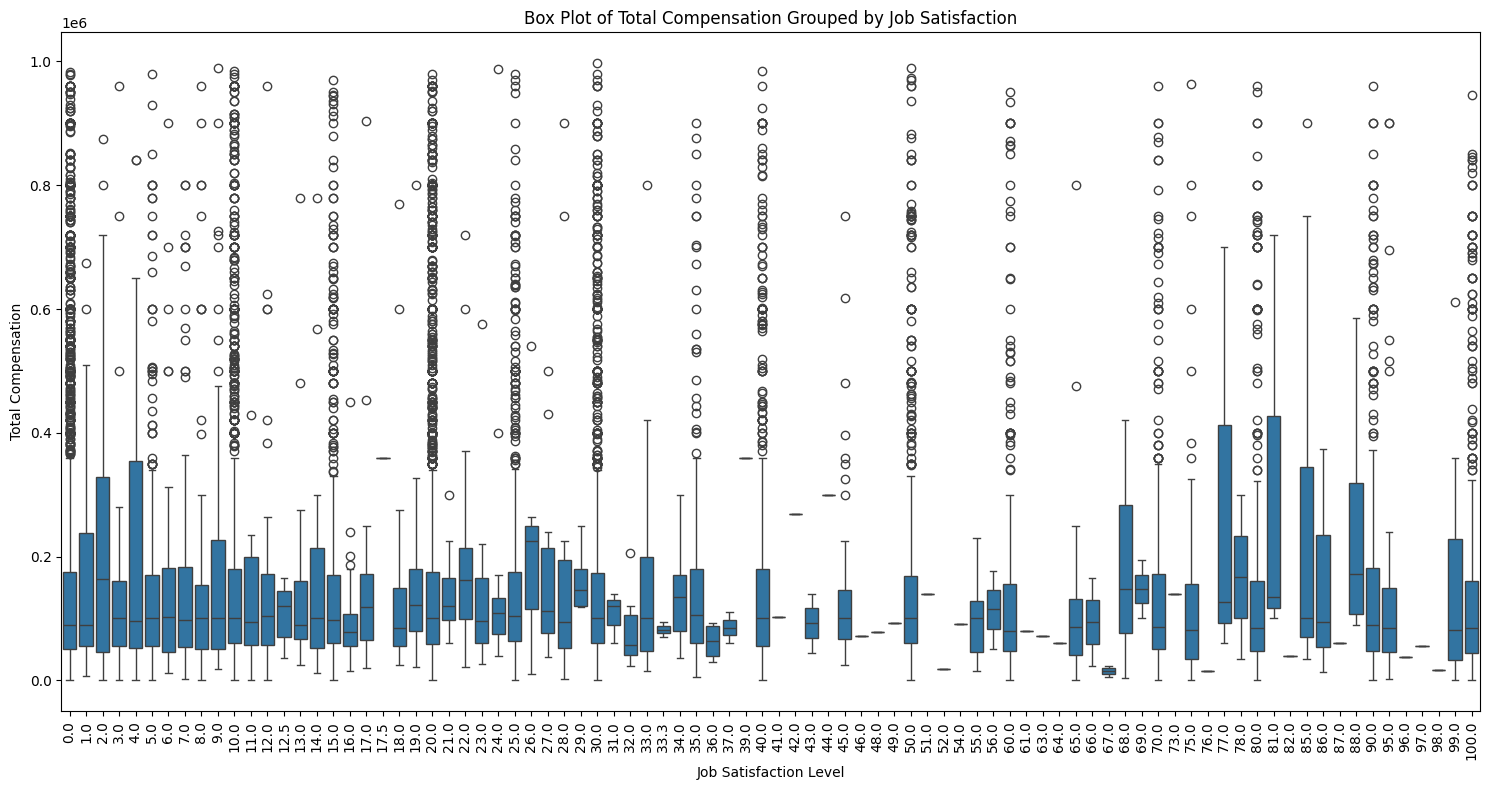

In [10]:
query = """
SELECT JobSatPoints_6, CompTotal
FROM main
WHERE JobSatPoints_6 IS NOT NULL
    AND CompTotal IS NOT NULL
    AND CompTotal > 0 
    AND CompTotal < 1000000;
"""

# Execute the query and load the result into a DataFrame
df_comp_sat = pd.read_sql_query(query, conn)

# Crear el boxplot
plt.figure(figsize=(15, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_comp_sat)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Total Compensation')
plt.title('Box Plot of Total Compensation Grouped by Job Satisfaction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


In [11]:
# Query to clean the data (Imputing missing DevType values as 'Unknown')
query = """
WITH cleaned_data AS (
    SELECT 
        COALESCE(DevType, 'Unknown') AS DevType,  -- Replace missing DevType with 'Unknown'
        ConvertedCompYearly
    FROM main
)
SELECT * FROM cleaned_data;
"""

# Execute the query and load the result into a DataFrame
df_cleaned = pd.read_sql_query(query, conn)






In [12]:
# Query to impute missing ConvertedCompYearly with the median by DevType
query = """
WITH cleaned_data AS (
    SELECT 
        COALESCE(DevType, 'Unknown') AS DevType,  -- Replace missing DevType with 'Unknown'
        ConvertedCompYearly
    FROM main
),
devtype_medians AS (
    SELECT 
        DevType,
        ROW_NUMBER() OVER (PARTITION BY DevType ORDER BY ConvertedCompYearly) AS row_num,
        COUNT(*) OVER (PARTITION BY DevType) AS total_count,
        ConvertedCompYearly
    FROM cleaned_data
    WHERE ConvertedCompYearly IS NOT NULL
)
SELECT 
    m.DevType,
    COALESCE(m.ConvertedCompYearly, 
             (SELECT ConvertedCompYearly 
              FROM devtype_medians dm 
              WHERE dm.DevType = m.DevType
              AND dm.row_num = (dm.total_count / 2) + 1
             )
    ) AS ConvertedCompYearly
FROM cleaned_data m;
"""

# Execute the query and load the result into a DataFrame
df_imputed = pd.read_sql_query(query, conn)



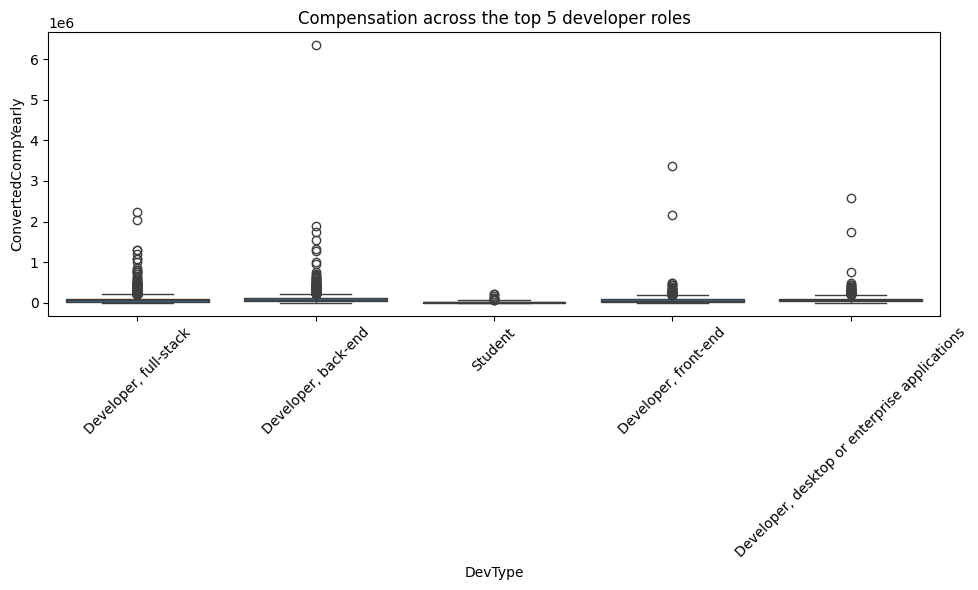

In [13]:
# Query to clean the data (Imputing missing DevType values as 'Unknown') and get top 5 DevTypes
query = """
WITH cleaned_data AS (
    SELECT 
        COALESCE(DevType, 'Unknown') AS DevType,  
        ConvertedCompYearly
    FROM main
),
top_5_devtypes AS (
    SELECT DevType, COUNT(*) AS devtype_count
    FROM cleaned_data
    WHERE DevType != 'Unknown'
    GROUP BY DevType
    ORDER BY devtype_count DESC
    LIMIT 5
)
SELECT m.DevType, m.ConvertedCompYearly
FROM cleaned_data m
JOIN top_5_devtypes t ON m.DevType = t.DevType
WHERE m.DevType != 'Unknown';
"""

# Execute the query and load the result into a DataFrame
df_top5 = pd.read_sql_query(query, conn)

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_top5, x='DevType', y='ConvertedCompYearly')
plt.title('Compensation across the top 5 developer roles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


In [14]:
# SQL query to clean the data by removing NULL and extreme values
query_clean_country = """
WITH cleaned_data AS (
    SELECT Country, CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
      AND CompTotal > 0 
      AND CompTotal < 1000000
      AND Country IS NOT NULL
)
SELECT * FROM cleaned_data;
"""

# Execute the query
df_clean_country = pd.read_sql_query(query_clean_country, conn)




In [15]:
# SQL query to select the top 5 countries based on the cleaned data
query_top_5_countries = """
WITH filtered_data AS (
    SELECT Country, CompTotal
    FROM main
    WHERE CompTotal IS NOT NULL
      AND CompTotal > 0 
      AND CompTotal < 1000000
      AND Country IS NOT NULL
)

SELECT Country, CompTotal
FROM filtered_data
WHERE Country IN (
    SELECT Country
    FROM filtered_data
    GROUP BY Country
    ORDER BY COUNT(*) DESC
    LIMIT 5
)
"""
#execute the query
df_top_5_countries = pd.read_sql_query(query_top_5_countries, conn)


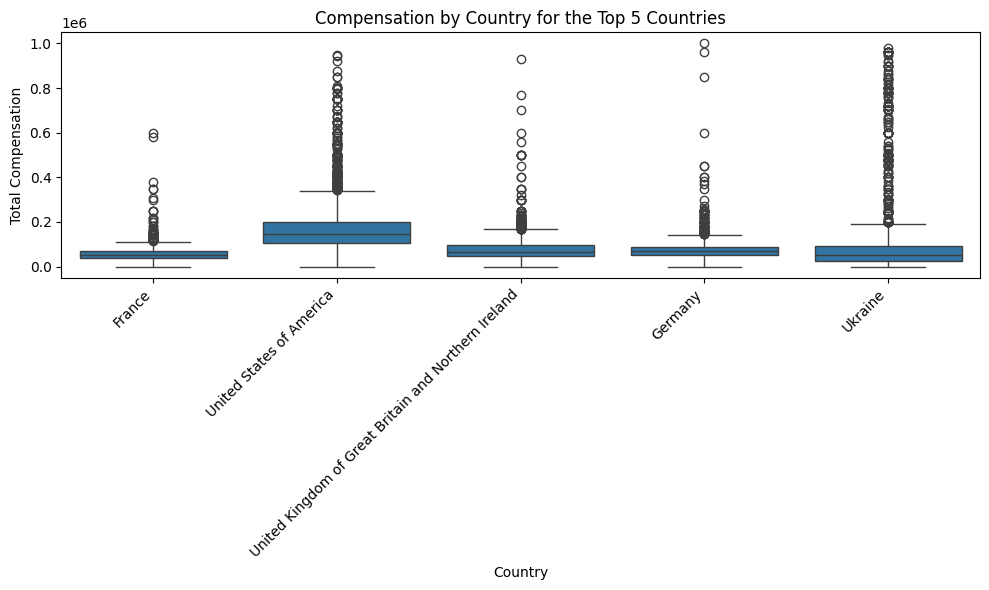

In [16]:
#create the plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5_countries)
plt.title('Compensation by Country for the Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


In [17]:
# Query to clean, split the Employment data, and group by Employment type and CompTotal
query_grouped_compensation = """
WITH RECURSIVE split_employment AS (
    -- Base case: First clean and split of Employment
    SELECT 
        CompTotal,
        TRIM(SUBSTR(Employment, 1, INSTR(Employment || ';', ';') - 1)) AS Employment_Split,
        SUBSTR(Employment, INSTR(Employment || ';', ';') + 1) AS Remaining,
        1 AS level
    FROM main
    WHERE Employment IS NOT NULL
      AND CompTotal IS NOT NULL
      AND CompTotal > 0
      AND CompTotal < 1000000

    UNION ALL

    -- Recursive case: Continue splitting until no ';' left
    SELECT 
        CompTotal,
        TRIM(SUBSTR(Remaining, 1, INSTR(Remaining || ';', ';') - 1)) AS Employment_Split,
        SUBSTR(Remaining, INSTR(Remaining || ';', ';') + 1),
        level + 1
    FROM split_employment
    WHERE LENGTH(Remaining) > 0 AND level < 10  -- Prevent infinite loops
)
SELECT 
    Employment_Split,
    CompTotal
FROM split_employment
WHERE Employment_Split IS NOT NULL;
"""

# Execute the query and load the result into a DataFrame
df_grouped_compensation = pd.read_sql_query(query_grouped_compensation, conn)







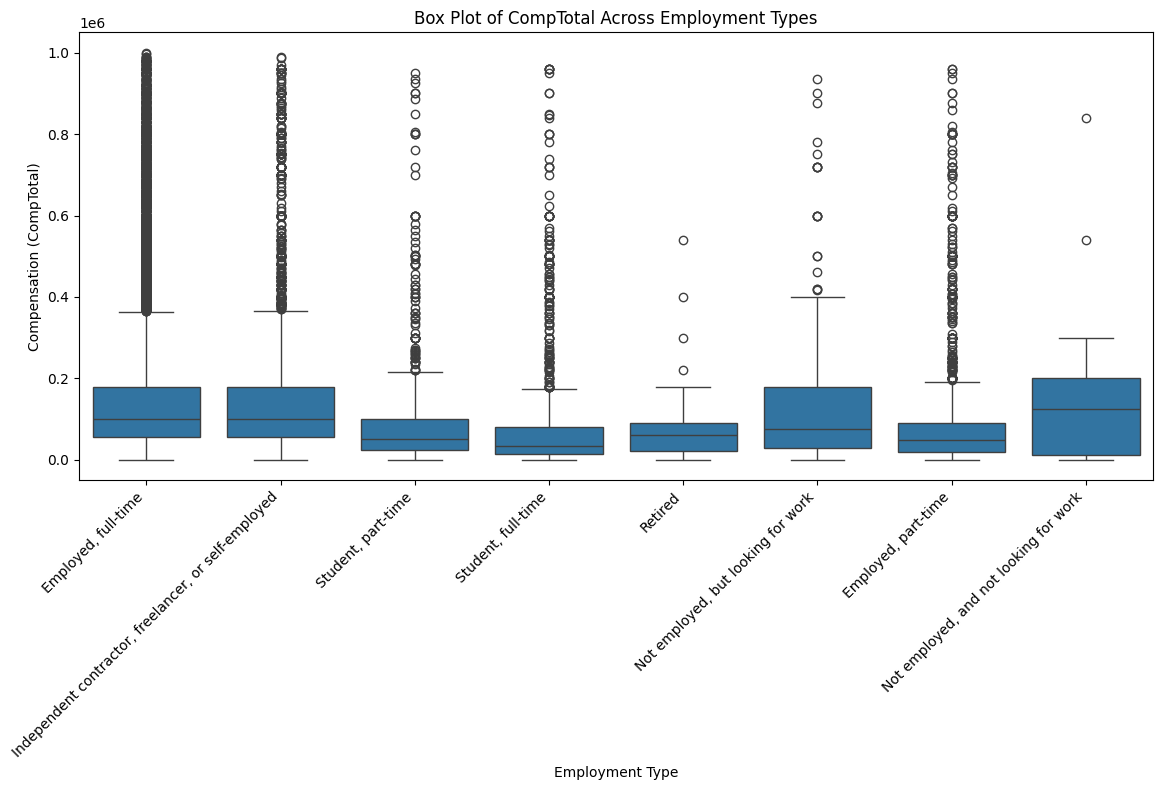

In [18]:
# Create the Plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Employment_Split', y='CompTotal', data=df_grouped_compensation)
plt.xticks(rotation=45, ha='right')  
plt.title('Box Plot of CompTotal Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Compensation (CompTotal)')
plt.tight_layout()
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


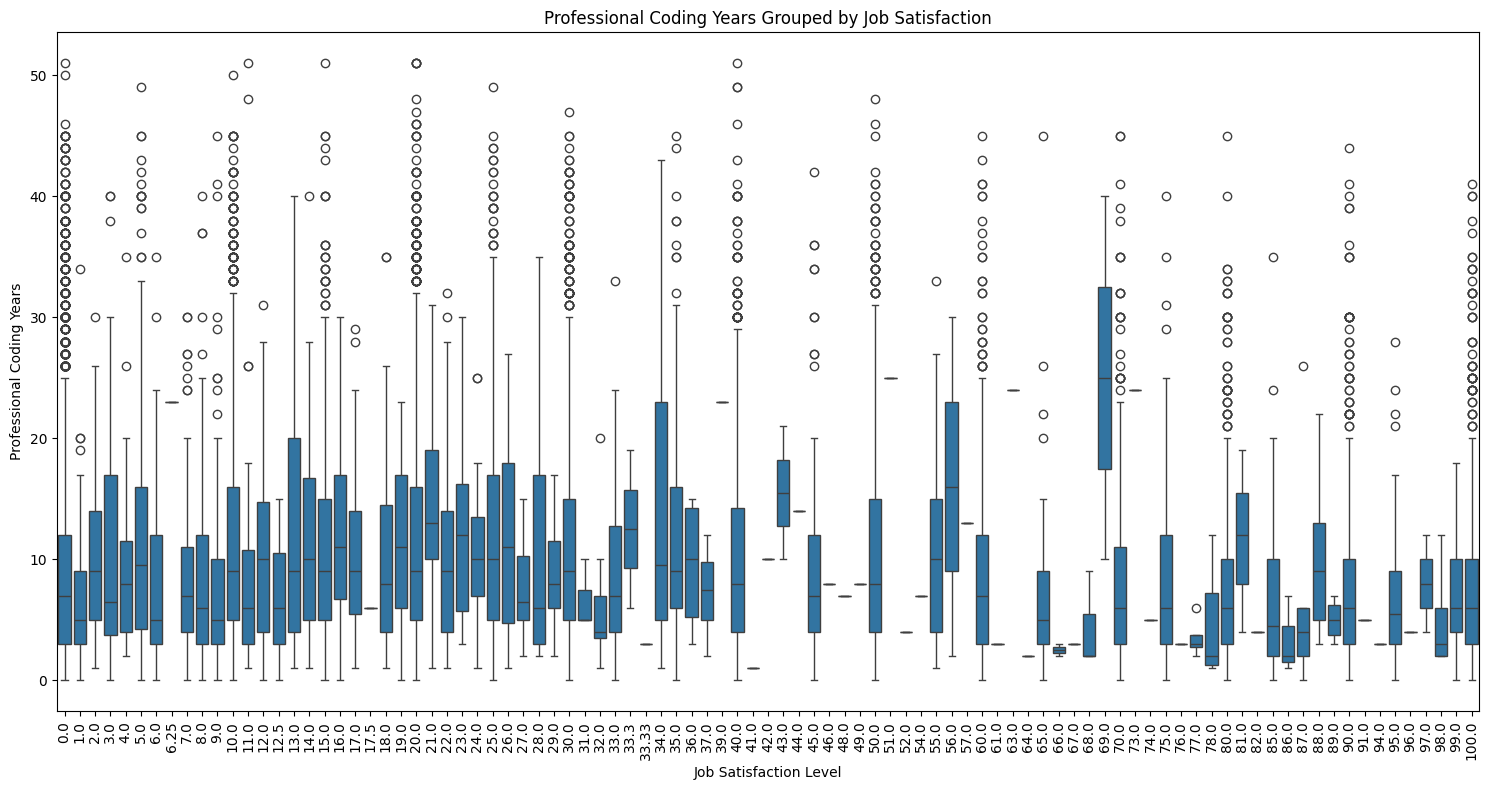

In [19]:
# Query to clean and transform YearsCodePro and JobSatPoints_6
query_years_sat = """
WITH cleaned_data AS (
    SELECT 
        CASE 
            WHEN YearsCodePro = 'Less than 1 year' THEN 0
            WHEN YearsCodePro = 'More than 50 years' THEN 51
            ELSE CAST(YearsCodePro AS INTEGER)
        END AS YearsCodePro,
        JobSatPoints_6
    FROM main
    WHERE YearsCodePro IS NOT NULL
      AND JobSatPoints_6 IS NOT NULL
      AND YearsCodePro != ''
)
SELECT YearsCodePro, JobSatPoints_6
FROM cleaned_data;
"""

# Execute the query and load the result into a DataFrame
df_years_sat_sql = pd.read_sql_query(query_years_sat, conn)


# Create the plot
plt.figure(figsize=(15,8))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_years_sat_sql)
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Professional Coding Years')
plt.title('Professional Coding Years Grouped by Job Satisfaction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()




### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [20]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
